In [1]:
import pandas as pd
import matplotlib.pyplot as plt

В файле `data/weather.csv` находит архив погоды в г. Санкт-Петербург с 1 января 2008 года по 31 декабря 2016 года. Файл состоит из двух столбцов - дата (**Day**) и средняя дневная температура в этот день (**t**). Прочитать данные в `pandas` можно с помощью кода:

In [2]:
df = pd.read_csv('weather.csv', encoding='utf-8', index_col=False, parse_dates=[0])

In [3]:
df.head(5)

,Day,t
0,2008-01-01,0
1,2008-01-02,-5
2,2008-01-03,-11
3,2008-01-04,-11
4,2008-01-05,-12


С помощью `Pandas` решите следующие задачи

**1.** Определите самый холодный год, в котором среднеяя температура была минимальная и самый теплый год. 

In [4]:
# ваш код
coldest_year = df.groupby(df.Day.dt.year).mean()
coldest_year[coldest_year.t == coldest_year.t.min()].index.values.astype(int)[0]

2012

In [6]:
hottest_year = df.groupby(df.Day.dt.year).mean()
hottest_year[hottest_year.t == hottest_year.t.max()].index.values.astype(int)[0]

2015

**2.** Определите год, где в январе было наибольшее число дней с положительной температурой ($\text{t} \ge 0$).

In [7]:
# ваш код
our_year = df[(df.Day.dt.month == 1) & (df.t > 0)].groupby(df.Day.dt.year).count()
our_year[our_year.Day == our_year.Day.max()].index.values.astype(int)[0]

2008

**3.** В каком году было самое холодное лето (по средней температуре)

In [8]:
# ваш код
coldest_summer = df[(df.Day.dt.month <= 8) & (df.Day.dt.month >= 6)].groupby(df.Day.dt.year).mean()
coldest_summer[coldest_summer.t == coldest_summer.t.min()].index.values.astype(int)[0]

2008

**4.** Найдите день с самой большим перепадом температуры, если сравнивать со следующим днем. 

In [10]:
# ваш код
df['difference'] = abs(df.t - df.t.shift(-1))
max_diff = df[df.difference == df.difference.max()].Day.values[0]
print(max_diff)

2014-05-26T00:00:00.000000000


**5.** Постройте график среднегодовых температур (по оси $x$ - год, по оси $y$ - средняя температура в этот год).

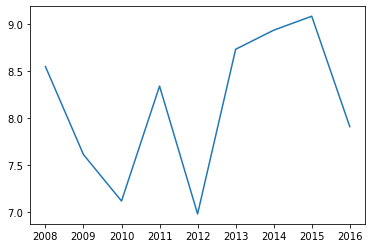

In [110]:
# ваш код
years = df.Day.dt.year.unique()
temps = df.groupby(df.Day.dt.year).mean()
temps = temps.t.values
plt.plot(years, temps)